In [11]:
import numpy as np
import scipy
import seaborn as sns
import sklearn
import pandas as pd
import pickle

%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.linear_model import Perceptron
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn import model_selection
import numpy as np
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import random
import torch
from torch import nn, optim
import math
from IPython import display

from sklearn import preprocessing


print('Finished successfully loading packages')


Finished successfully loading packages


In [574]:
df = pd.read_csv('diabetes.csv')

In [575]:
df.drop('Zodiac', axis=1, inplace = True)

In [576]:
X = df.iloc[:, 1:]
y = df['Diabetes']
X = X.astype(float)
y = y.astype(float)

In [580]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)

## Question 1

In [583]:
print(df.columns)
continuous_cols = ['BMI', 'MentalHealth', 'PhysicalHealth', 'AgeBracket', 'EducationBracket', 'IncomeBracket']
binary_cols = ['HighBP', 'HighChol', 'Smoker', 'Stroke','Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
             'HasHealthcare', 'NotAbleToAffordDoctor', 'HardToClimbStairs', 'BiologicalSex']

Index(['Diabetes', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
       'HasHealthcare', 'NotAbleToAffordDoctor', 'GeneralHealth',
       'MentalHealth', 'PhysicalHealth', 'HardToClimbStairs', 'BiologicalSex',
       'AgeBracket', 'EducationBracket', 'IncomeBracket'],
      dtype='object')


In [585]:
clf = Perceptron(tol=1e-3, random_state=0, shuffle=True)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_norm = (X_train - mean) / std
clf.fit(X_train_norm,y_train)

Perceptron()

In [586]:
clf.score((X_test- mean) / std, y_test)

0.8015807316304006

In [589]:
y_pred = clf.predict(X_test)

0.6572786964890827


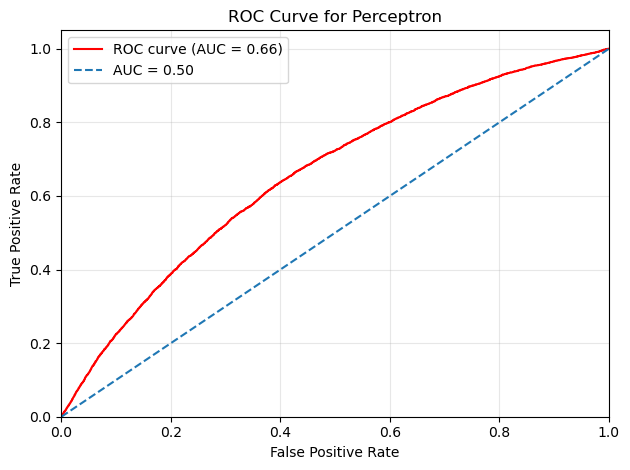

In [192]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X_test_norm = (X_test - mean) / std

y_scores = clf.decision_function(X_test_norm)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

print(roc_auc)

# Plot
plt.plot(fpr, tpr, color='red', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1],linestyle='--', label='AUC = 0.50')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Perceptron')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Question 2

In [433]:
D = 20 
C = 2 
H = 10

learning_rate = 1e-2
lambda_l2 = 1e-1 

model = nn.Sequential(
    nn.Linear(D, H),
     nn.Sigmoid(),
    nn.Linear(H, C)
)

In [435]:
print(df.columns)
continuous_cols = ['BMI', 'MentalHealth', 'GeneralHealth','PhysicalHealth', 'AgeBracket', 'EducationBracket', 'IncomeBracket']
binary_cols = ['HighBP', 'HighChol', 'Smoker', 'Stroke','Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
             'HasHealthcare', 'NotAbleToAffordDoctor', 'HardToClimbStairs', 'BiologicalSex']

Index(['Diabetes', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
       'HasHealthcare', 'NotAbleToAffordDoctor', 'GeneralHealth',
       'MentalHealth', 'PhysicalHealth', 'HardToClimbStairs', 'BiologicalSex',
       'AgeBracket', 'EducationBracket', 'IncomeBracket'],
      dtype='object')


In [437]:
X_train_cont = X_train[continuous_cols]
X_test_cont = X_test[continuous_cols]

feature_means = X_train_cont.mean(axis=0)
feature_stds = X_train_cont.std(axis=0)

X_train_cont = (X_train_cont - feature_means) / feature_stds
X_test_cont = (X_test_cont - feature_means) / feature_stds

X_train_bin = X_train[binary_cols]
X_test_bin = X_test[binary_cols]

X_train_pth = torch.cat([torch.tensor(X_train_cont.values, dtype=torch.float), torch.tensor(X_train_bin.values, dtype=torch.float)], dim=1)
X_test_pth = torch.cat([torch.tensor(X_test_cont.values, dtype=torch.float), torch.tensor(X_test_bin.values, dtype=torch.float)], dim=1)
y_train_pth = torch.tensor(y_train.values, dtype=torch.long)
y_test_pth = torch.tensor(y_test.values, dtype=torch.long)

In [439]:
criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) 


for t in range(1000):
    
    y_pred = model(X_train_pth)
    
    loss = criterion(y_pred, y_train_pth)
    score, predicted = torch.max(y_pred, 1)
    acc = (y_train_pth == predicted).sum().float() / len(y_train_pth)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.395706, [ACCURACY]: 0.861


In [440]:
X_test_cont = X_test[continuous_cols]
X_test_cont = (X_test_cont - feature_means) / feature_stds 

X_test_bin = X_test[binary_cols]

X_test_pth = torch.cat([torch.tensor(X_test_cont.values, dtype=torch.float), torch.tensor(X_test_bin.values, dtype=torch.float)], dim=1)

out = model(X_test_pth)

_, predicted = torch.max(out.data, 1)

accuracy = 100 * torch.sum(y_test_pth == predicted).double() / len(y_test_pth)

print('Accuracy of the network: %.4f %%' % accuracy)
probs = torch.softmax(out, dim=1) 
positive_probs = probs[:, 1]

y_true = y_test_pth.numpy()
y_scores = positive_probs.detach().numpy()

auc = roc_auc_score(y_true, y_scores)
print("AUC: %.4f" % auc)

Accuracy of the network: 86.0513 %
AUC: 0.7766


## Question 3

In [423]:
D = 20
C = 2
H = 10 

learning_rate = 1e-2
lambda_l2 = 1e-1 

model = nn.Sequential(
    nn.Linear(D, 128),  
    nn.ReLU(),
    nn.Linear(128, 256), 
    nn.ReLU(),
    nn.Linear(256, 64), 
    nn.ReLU(),
    nn.Linear(64, C)
)

In [425]:
print(df.columns)
continuous_cols = ['BMI', 'MentalHealth', 'GeneralHealth','PhysicalHealth', 'AgeBracket', 'EducationBracket', 'IncomeBracket']
binary_cols = ['HighBP', 'HighChol', 'Smoker', 'Stroke','Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
             'HasHealthcare', 'NotAbleToAffordDoctor', 'HardToClimbStairs', 'BiologicalSex']

Index(['Diabetes', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
       'HasHealthcare', 'NotAbleToAffordDoctor', 'GeneralHealth',
       'MentalHealth', 'PhysicalHealth', 'HardToClimbStairs', 'BiologicalSex',
       'AgeBracket', 'EducationBracket', 'IncomeBracket'],
      dtype='object')


In [427]:
X_train_cont = X_train[continuous_cols]
X_test_cont = X_test[continuous_cols]

feature_means = X_train_cont.mean(axis=0)
feature_stds = X_train_cont.std(axis=0)

X_train_cont = (X_train_cont - feature_means) / feature_stds
X_test_cont = (X_test_cont - feature_means) / feature_stds

X_train_bin = X_train[binary_cols]
X_test_bin = X_test[binary_cols]

X_train_pth = torch.cat([torch.tensor(X_train_cont.values, dtype=torch.float), torch.tensor(X_train_bin.values, dtype=torch.float)], dim=1)
X_test_pth = torch.cat([torch.tensor(X_test_cont.values, dtype=torch.float), torch.tensor(X_test_bin.values, dtype=torch.float)], dim=1)
y_train_pth = torch.tensor(y_train.values, dtype=torch.long)
y_test_pth = torch.tensor(y_test.values, dtype=torch.long)

In [429]:
criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

for t in range(1000):
    
    y_pred = model(X_train_pth)
    
    loss = criterion(y_pred, y_train_pth)
    score, predicted = torch.max(y_pred, 1)
    acc = (y_train_pth == predicted).sum().float() / len(y_train_pth)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.397286, [ACCURACY]: 0.861


In [431]:
X_test_cont = X_test[continuous_cols]
X_test_cont = (X_test_cont - feature_means) / feature_stds  

X_test_bin = X_test[binary_cols]

X_test_pth = torch.cat([torch.tensor(X_test_cont.values, dtype=torch.float), torch.tensor(X_test_bin.values, dtype=torch.float)], dim=1)

out = model(X_test_pth)

_, predicted = torch.max(out.data, 1)

accuracy = 100 * torch.sum(y_test_pth == predicted).double() / len(y_test_pth)

print('Accuracy of the network: %.4f %%' % accuracy)
probs = torch.softmax(out, dim=1) 
positive_probs = probs[:, 1]

y_true = y_test_pth.numpy()
y_scores = positive_probs.detach().numpy()

auc = roc_auc_score(y_true, y_scores)
print("AUC: %.4f" % auc)

Accuracy of the network: 86.0513 %
AUC: 0.7640


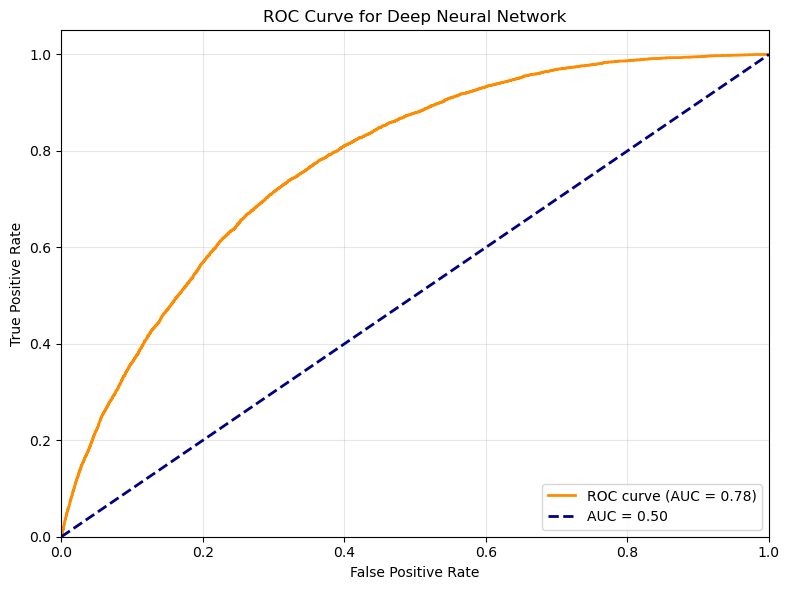

In [445]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='AUC = 0.50')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Deep Neural Network')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Question 4

In [482]:
df.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
       'HasHealthcare', 'NotAbleToAffordDoctor', 'GeneralHealth',
       'MentalHealth', 'PhysicalHealth', 'HardToClimbStairs', 'BiologicalSex',
       'AgeBracket', 'EducationBracket', 'IncomeBracket', 'Zodiac'],
      dtype='object')

In [484]:
df = pd.read_csv('diabetes.csv')

In [485]:
X = df.drop(columns=['BMI'])
y = df["BMI"]

In [488]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)

In [250]:
D = 20 
C = 1 
H = 10 

learning_rate = 1e-2
lambda_l2 = 1e-1 

model = nn.Sequential(
    nn.Linear(D, H),
     nn.ReLU(),
    nn.Linear(H, C)
)

In [252]:
print(df.columns)
continuous_cols = ['GeneralHealth','MentalHealth', 'PhysicalHealth', 'AgeBracket', 'EducationBracket', 'IncomeBracket']
binary_cols = ['Diabetes','HighBP', 'HighChol', 'Smoker', 'Stroke','Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
             'HasHealthcare', 'NotAbleToAffordDoctor', 'HardToClimbStairs', 'BiologicalSex']

Index(['Diabetes', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
       'HasHealthcare', 'NotAbleToAffordDoctor', 'GeneralHealth',
       'MentalHealth', 'PhysicalHealth', 'HardToClimbStairs', 'BiologicalSex',
       'AgeBracket', 'EducationBracket', 'IncomeBracket', 'Zodiac'],
      dtype='object')


In [254]:
X_train_cont = X_train[continuous_cols]
X_test_cont = X_test[continuous_cols]

feature_means = X_train_cont.mean(axis=0)
feature_stds = X_train_cont.std(axis=0)

X_train_cont = (X_train_cont - feature_means) / feature_stds
X_test_cont = (X_test_cont - feature_means) / feature_stds

X_train_bin = X_train[binary_cols]
X_test_bin = X_test[binary_cols]

X_train_pth = torch.cat([torch.tensor(X_train_cont.values, dtype=torch.float), torch.tensor(X_train_bin.values, dtype=torch.float)], dim=1)
X_test_pth = torch.cat([torch.tensor(X_test_cont.values, dtype=torch.float), torch.tensor(X_test_bin.values, dtype=torch.float)], dim=1)
y_train_pth = torch.tensor(y_train.values, dtype=torch.float).view(-1, 1)
y_test_pth = torch.tensor(y_test.values, dtype=torch.float).view(-1, 1)

In [256]:
criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

for t in range(1000):
    
    y_pred = model(X_train_pth)
    
    loss = criterion(y_pred, y_train_pth)
    print("[EPOCH]: %i, [LOSS or RMSE]: %.6f" % (t, math.sqrt(loss.item())))
    display.clear_output(wait=True)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

[EPOCH]: 999, [LOSS or RMSE]: nan


In [257]:
model.eval() 
with torch.no_grad():
    y_test_pred = model(X_test_pth)
    test_loss = criterion(y_test_pred, y_test_pth)
    print(f"[TEST LOSS or RMSE]: {math.sqrt(test_loss.item()):.6f}")

[TEST LOSS or RMSE]: nan


## Question 5

In [246]:
progressionList = []

In [526]:
D = 20 
C = 1 
H = 10 

learning_rate = 5e-3
lambda_l2 = 1e-1 

model = nn.Sequential(
    nn.Linear(D, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, C)
)


In [528]:
print(df.columns)
continuous_cols = ['GeneralHealth','MentalHealth', 'PhysicalHealth', 'AgeBracket', 'EducationBracket', 'IncomeBracket']
binary_cols = ['Diabetes','HighBP', 'HighChol', 'Smoker', 'Stroke','Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
             'HasHealthcare', 'NotAbleToAffordDoctor', 'HardToClimbStairs', 'BiologicalSex']

Index(['Diabetes', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
       'HasHealthcare', 'NotAbleToAffordDoctor', 'GeneralHealth',
       'MentalHealth', 'PhysicalHealth', 'HardToClimbStairs', 'BiologicalSex',
       'AgeBracket', 'EducationBracket', 'IncomeBracket', 'Zodiac'],
      dtype='object')


In [530]:
X_train_cont = X_train[continuous_cols]
X_test_cont = X_test[continuous_cols]

feature_means = X_train_cont.mean(axis=0)
feature_stds = X_train_cont.std(axis=0)

X_train_cont = (X_train_cont - feature_means) / feature_stds
X_test_cont = (X_test_cont - feature_means) / feature_stds

X_train_bin = X_train[binary_cols]
X_test_bin = X_test[binary_cols]

X_train_pth = torch.cat([torch.tensor(X_train_cont.values, dtype=torch.float), torch.tensor(X_train_bin.values, dtype=torch.float)], dim=1)
X_test_pth = torch.cat([torch.tensor(X_test_cont.values, dtype=torch.float), torch.tensor(X_test_bin.values, dtype=torch.float)], dim=1)
y_train_pth = torch.tensor(y_train.values, dtype=torch.float).view(-1, 1)
y_test_pth = torch.tensor(y_test.values, dtype=torch.float).view(-1, 1)

In [532]:
criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

for t in range(3000):
    
    y_pred = model(X_train_pth)
    
    loss = criterion(y_pred, y_train_pth)
    print("[EPOCH]: %i, [LOSS or RMSE]: %.6f" % (t, math.sqrt(loss.item())))
    display.clear_output(wait=True)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

[EPOCH]: 2999, [LOSS or RMSE]: 5.985972


In [536]:
model.eval() 
with torch.no_grad():
    y_test_pred = model(X_test_pth)
    test_loss = criterion(y_test_pred, y_test_pth)
    progressionList.append(math.sqrt(test_loss.item()))
    print(f"[TEST LOSS or RMSE]: {math.sqrt(test_loss.item()):.6f}")

[TEST LOSS or RMSE]: 5.887513


In [538]:
print(progressionList)

[6.105563094080741, 6.638693423122575, 6.99263103080022, 6.011016269263915, 6.007668363233581, 5.999279614753433, 5.992621016953436, 5.893396671581956, 5.887512841990207, 5.887512841990207]


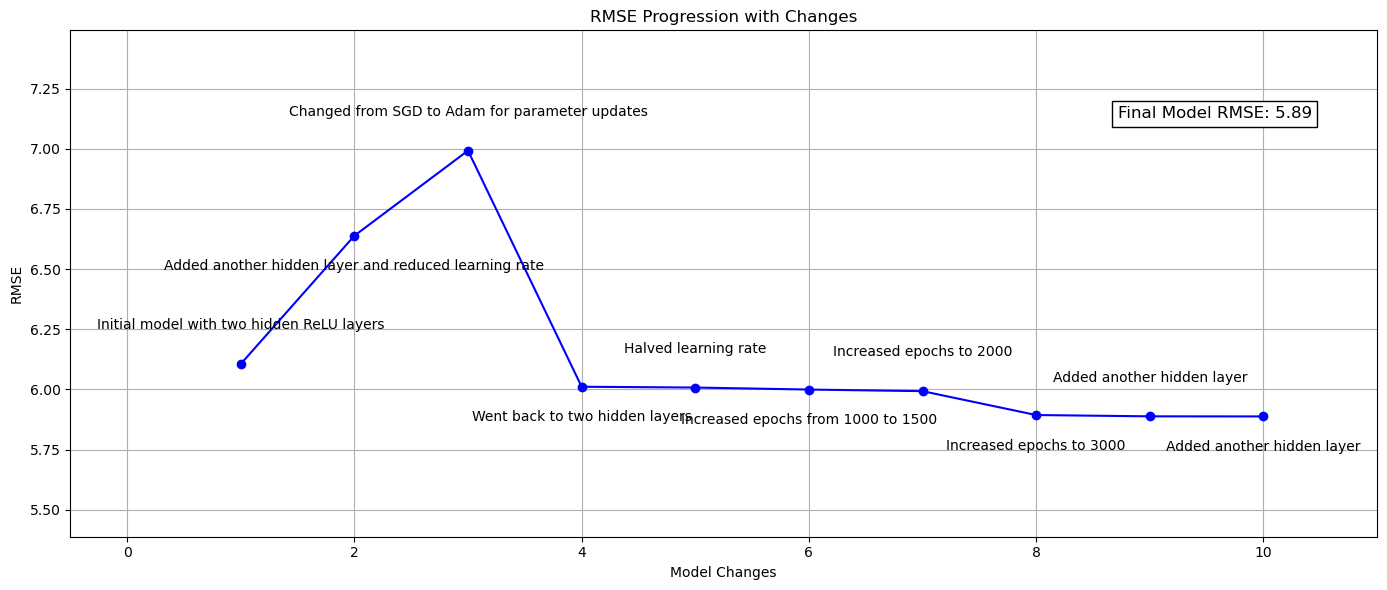

In [562]:
import matplotlib.pyplot as plt

progressionList = [6.105563094080741, 6.638693423122575, 6.99263103080022, 6.011016269263915, 
                   6.007668363233581, 5.999279614753433, 5.992621016953436, 5.893396671581956, 5.887966, 5.887512841990207]

improvements = [
    "Initial model with two hidden ReLU layers", 
    "Added another hidden layer and reduced learning rate", 
    "Changed from SGD to Adam for parameter updates", 
    "Went back to two hidden layers", 
    "Halved learning rate", 
    "Increased epochs from 1000 to 1500", 
    "Increased epochs to 2000",
    "Increased epochs to 3000", 
    "Added another hidden layer", 
    "Added another hidden layer", 
]

plt.figure(figsize=(14, 6)) 
plt.plot(range(1, len(progressionList) + 1), progressionList, marker='o', linestyle='-', color='b')

for i, txt in enumerate(improvements):
    offset = 25 if i % 2 == 0 else -25
    plt.annotate(txt, (i + 1, progressionList[i]), textcoords="offset points", xytext=(0, offset), ha='center')

plt.xlabel('Model Changes')
plt.ylabel('RMSE')
plt.title('RMSE Progression with Changes')
plt.grid(True)

plt.ylim(min(progressionList) - 0.5, max(progressionList) + 0.5)
plt.xlim(-0.5, 11)

final_rmse = 5.89
plt.text(0.95, 0.85, f"Final Model RMSE: {final_rmse}", 
         transform=plt.gca().transAxes, fontsize=12, ha='right', va='top', 
         bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()

plt.show()


## Extra Credit

## a)

In [619]:
df = pd.read_csv("diabetes.csv")

zodiac_dummies = pd.get_dummies(df['Zodiac'], prefix='Zodiac').astype(int)
df = pd.concat([df.drop(columns='Zodiac'), zodiac_dummies], axis=1)

continuous_cols = ['BMI', 'MentalHealth', 'GeneralHealth','PhysicalHealth', 'AgeBracket', 'EducationBracket', 'IncomeBracket']
binary_cols = ['HighBP', 'HighChol', 'Smoker', 'Stroke','Myocardial', 'PhysActivity', 'Fruit', 'Vegetables', 'HeavyDrinker',
               'HasHealthcare', 'NotAbleToAffordDoctor', 'HardToClimbStairs', 'BiologicalSex']
zodiac_cols = zodiac_dummies.columns.tolist()
target_col = 'Diabetes'

X = df[continuous_cols + binary_cols + zodiac_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_cont = pd.DataFrame(scaler.fit_transform(X_train[continuous_cols]), columns=continuous_cols)
X_test_cont = pd.DataFrame(scaler.transform(X_test[continuous_cols]), columns=continuous_cols)

X_train_bin = X_train[binary_cols].reset_index(drop=True)
X_test_bin = X_test[binary_cols].reset_index(drop=True)
X_train_zod = X_train[zodiac_cols].reset_index(drop=True)
X_test_zod = X_test[zodiac_cols].reset_index(drop=True)

X_train_scaled = pd.concat([X_train_cont, X_train_bin, X_train_zod], axis=1)
X_test_scaled = pd.concat([X_test_cont, X_test_bin, X_test_zod], axis=1)

y_train_pth = torch.tensor(y_train.values, dtype=torch.long)
y_test_pth = torch.tensor(y_test.values, dtype=torch.long)

C = 2
H = 10
learning_rate = 1e-2
lambda_l2 = 1e-1

def evaluate_auc_with_exclusion(exclude_feature):
    if exclude_feature is None:
        features_to_use = list(X_train_scaled.columns)
    elif exclude_feature == "Zodiac":
        features_to_use = [col for col in X_train_scaled.columns if col not in zodiac_cols]
    else:
        features_to_use = [col for col in X_train_scaled.columns if col != exclude_feature]

    X_train_excluded = torch.tensor(X_train_scaled[features_to_use].values, dtype=torch.float32)
    X_test_excluded = torch.tensor(X_test_scaled[features_to_use].values, dtype=torch.float32)

    model = nn.Sequential(
        nn.Linear(len(features_to_use), H),
        nn.Sigmoid(),
        nn.Linear(H, C)
    )

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

    for _ in range(1000):
        y_pred = model(X_train_excluded)
        loss = criterion(y_pred, y_train_pth)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    out = model(X_test_excluded)
    probs = torch.softmax(out, dim=1)
    y_scores = probs[:, 1].detach().numpy()
    auc = roc_auc_score(y_test, y_scores)

    del model, optimizer, X_train_excluded, X_test_excluded
    gc.collect()
    torch.cuda.empty_cache()

    return auc


In [621]:
full_model_auc = evaluate_auc_with_exclusion(None)

auc_results = {}
all_features = continuous_cols + binary_cols + ['Zodiac'] 
for feature in all_features:
    print(f"Testing exclusion of: {feature}")
    auc = evaluate_auc_with_exclusion(feature)
    auc_results[feature] = auc
    print(f"AUC without {feature}: {auc:.4f}")

plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
plt.xlabel('Omitted Predictor')
plt.ylabel('AUC Score')
plt.title("AUC Scores Without Each Predictor")

ax = sns.barplot(x=list(auc_results.keys()), y=list(auc_results.values()))

plt.hlines(y=full_model_auc, xmin=-0.5, xmax=len(auc_results) - 0.5, color='red', linestyle='--',
           label=f'Full Model AUC = {full_model_auc:.3f}')

for i, auc_val in enumerate(auc_results.values()):
    ax.text(i, auc_val - 0.01, f"{auc_val:.3f}", ha='center', va='center', fontsize=9, color='black', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

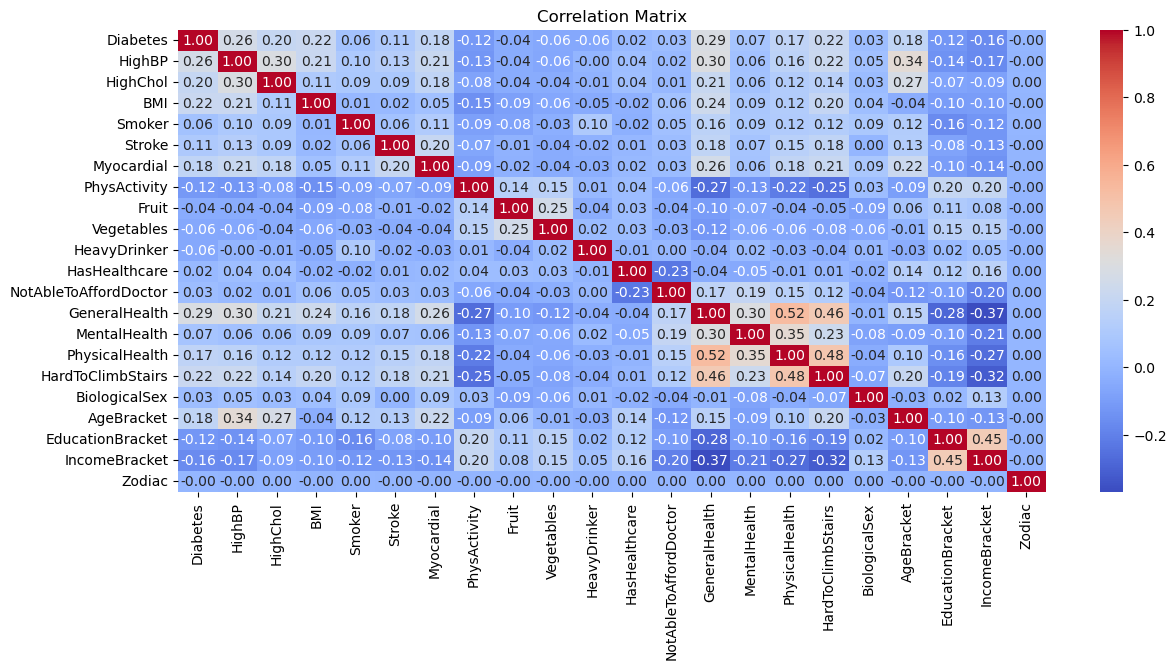

                       Diabetes    HighBP  HighChol       BMI    Smoker  \
Diabetes               1.000000  0.263129  0.200276  0.216843  0.060789   
HighBP                 0.263129  1.000000  0.298199  0.213748  0.096991   
HighChol               0.200276  0.298199  1.000000  0.106722  0.091299   
BMI                    0.216843  0.213748  0.106722  1.000000  0.013804   
Smoker                 0.060789  0.096991  0.091299  0.013804  1.000000   
Stroke                 0.105816  0.129575  0.092620  0.020153  0.061173   
Myocardial             0.177282  0.209361  0.180765  0.052904  0.114441   
PhysActivity          -0.118133 -0.125267 -0.078046 -0.147294 -0.087401   
Fruit                 -0.040779 -0.040555 -0.040859 -0.087518 -0.077666   
Vegetables            -0.056584 -0.061266 -0.039874 -0.062275 -0.030678   
HeavyDrinker          -0.057056 -0.003972 -0.011543 -0.048736  0.101619   
HasHealthcare          0.016255  0.038425  0.042230 -0.018471 -0.023251   
NotAbleToAffordDoctor  0.

In [627]:
df = pd.read_csv("diabetes.csv")

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()